In [ ]:
#matplotlib는 한글을 지원하지 않음 : 글꼴 설치

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq #나눔글꼴
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [198]:
# 선형회귀
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
path = '/content/drive/MyDrive/00_01_colab/dataset/1조 생활폐기물 사용자료.csv'

data = pd.read_csv(path, encoding = 'CP949')
print(data.shape)

data.head()

(72, 16)


,생활폐기물총량,1인당 국민총소득,신재생에너지 생산량,운반차량총계,소각업체수,자가점유율,외식산업경기동향지수,실업률,소비자물가지수,인구,가구 인터넷 보급률,1인당 생활폐기물발생량,평균기온,강수량,평균상대습도,고용률
0,3456.2,304.8,1442239,845,170,0.57,74.79,3.7,98.11,53070891,87.9,31.7,-1.9,24.5,0.83,0.595
1,3531.9,305.8,1442239,852,172,0.57,75.03,4.6,98.86,53123279,87.3,33.0,-0.1,34.9,0.76,0.592
2,3523.4,305.7,1479863,853,175,0.57,74.61,4.5,98.75,53175402,87.8,34.1,8.0,111.9,0.94,0.602
3,3487.6,303.3,1479863,856,168,0.58,73.85,4.1,98.93,53227577,87.2,36.3,13.2,139.4,0.87,0.609
4,3458.5,304.8,1592734,857,172,0.58,74.12,4.0,98.98,53279804,88.0,36.5,17.6,132.5,0.92,0.613


In [199]:
# 스탠다드 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
print(data.shape)

(72, 16)


In [200]:
# 종속변수 독립변수 분리
data_X = scaled_data[:,1:]
data_y = scaled_data[:,:1] # 종속변수

array([[-2.16874077],
       [-1.67324678],
       [-1.72888349],
       [-1.96321222],
       [-2.15368613],
       [-1.54953692],
       [-2.03717631],
       [-1.74001083],
       [-1.86961163],
       [-2.07644929],
       [-1.83557506],
       [-1.80153848],
       [ 0.34800217],
       [-0.08530962],
       [ 0.81665963],
       [-0.02443652],
       [-0.12000075],
       [ 0.37680234],
       [ 0.65694954],
       [ 0.18371023],
       [ 0.48349392],
       [-0.35956587],
       [ 0.07701866],
       [ 0.74073188],
       [ 0.80291409],
       [ 1.60473726],
       [ 1.2682988 ],
       [ 0.70865896],
       [ 1.53077316],
       [ 1.17862552],
       [ 1.71077428],
       [ 1.38546317],
       [ 0.93578764],
       [ 1.88226626],
       [ 1.01302449],
       [ 1.40051781],
       [ 0.05672763],
       [ 0.16538285],
       [-0.09120057],
       [ 0.41083892],
       [-0.01069098],
       [ 0.33949302],
       [ 0.48807576],
       [ 0.09927335],
       [ 0.35323856],
       [ 0

In [201]:
# 학습데이터, 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [202]:
# 선형회귀
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [203]:
linear.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = linear.predict(X_test)
y_pred

array([[-1.96062469],
       [-0.28859308],
       [-0.22301932],
       [-1.63275374],
       [ 1.07494295],
       [ 0.50124621],
       [-1.48512238],
       [ 0.90026071],
       [-0.0159125 ],
       [ 0.08308483],
       [ 0.67075188],
       [ 1.38153298],
       [-1.57948831],
       [ 0.79817141],
       [-1.78167303]])

In [205]:
# 선형회귀 mse, r2
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('mse :', round(mse,2)) # 평균 제곱 오차
r2 = r2_score(y_test,y_pred) # 결정 계수(R-squared)
print('r2 :',round(r2,2))

mse : 0.17
r2 : 0.9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


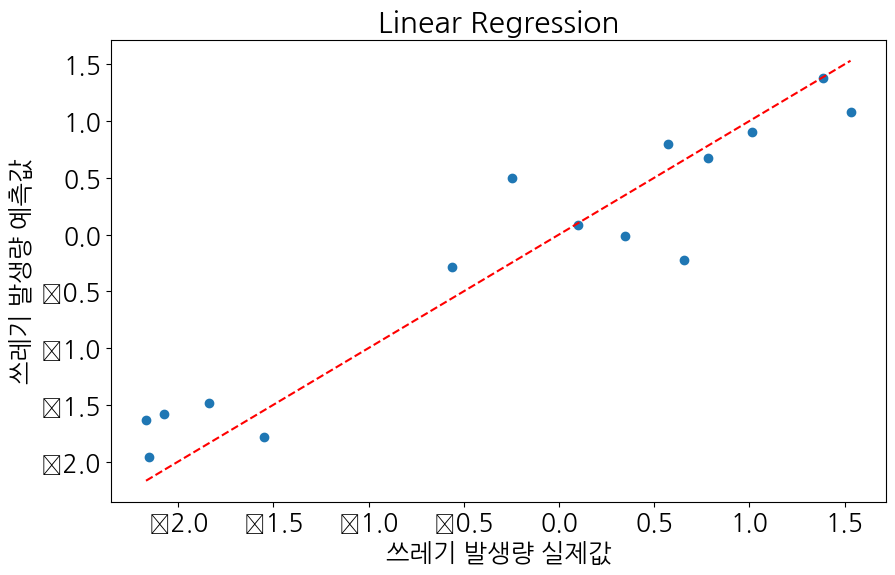

In [207]:
# 선형회귀 그래프
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, label = 'Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('Linear Regression')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


#스케일러 생성
scaler = StandardScaler()

# 훈련 데이터와 테스트 데이터 정규화
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Regression 모델 생성 및 학습
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Polynomial Regression mse, r2점수
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression")
print(r2_poly)
print("MSE:", round(mse_poly,2))
print("R2:", round(r2_poly,2))

# Polynomial Regression 모델 예측 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='b', alpha=0.6, label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title('PolynomialFeatures')
plt.xlabel('생활폐기물발생량 실제값')
plt.ylabel('생활폐기물발생량 예측값')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# DT
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# mse,r2점수
r2 = r2_score(y_test, y_pred)
y_pred = DT.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', round(mse,2))
print('R2 Score:', round(r2,2))

In [ ]:
# DT 시각화
y_pred = DT.predict(X_test)

plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title('DecisionTreeRegressor')
plt.xlabel('생활폐기물발생량 실제값')
plt.ylabel('생활폐기물발생량 예측값')
plt.grid()
plt.show()

In [ ]:
# DT feature importances
importances = DT.feature_importances_
indices = np.argsort(importances)[::-1] # 내림차순 정렬
columns_names = data.columns[1:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), columns_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# DT best parameter

DT = DecisionTreeRegressor(random_state = 42)

param_grid = {
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = DT, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                           cv = 3, verbose = 1, n_jobs = -1)

In [ ]:
grid_search.fit(X, y)
print("베스트 파라미터", grid_search.best_params_)

In [ ]:
best_params =  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
best_DT = DecisionTreeRegressor(**best_params)

best_DT.fit(X_train, y_train)

# DT best parameter mse,r2 점수
y_pred = best_DT.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse :.2f}')
print(f'r2: {r2 :.2f}')

In [ ]:
# DT best parameter 그래프
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')
plt.title('Best_param_DecisionTreeRegressor')
plt.xlabel('생활폐기물발생량 실제값')
plt.ylabel('생활폐기물발생량 예측값')
plt.grid()
plt.show()

In [ ]:
# DT best parameter feature importances
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1] # 내림차순 정렬
columns_names = data.columns[1:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), columns_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

<ipython-input-215-8cc18e2647d5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Mean Squared Error: 0.13
R^2 Score: 0.92


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


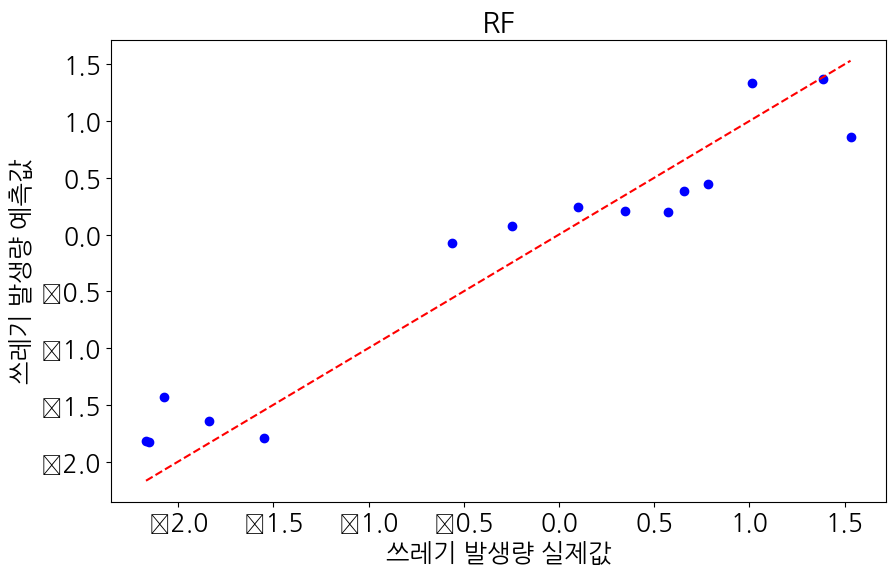

In [215]:
# rf
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# mse, r2점수
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# rf 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('RF')
plt.show()

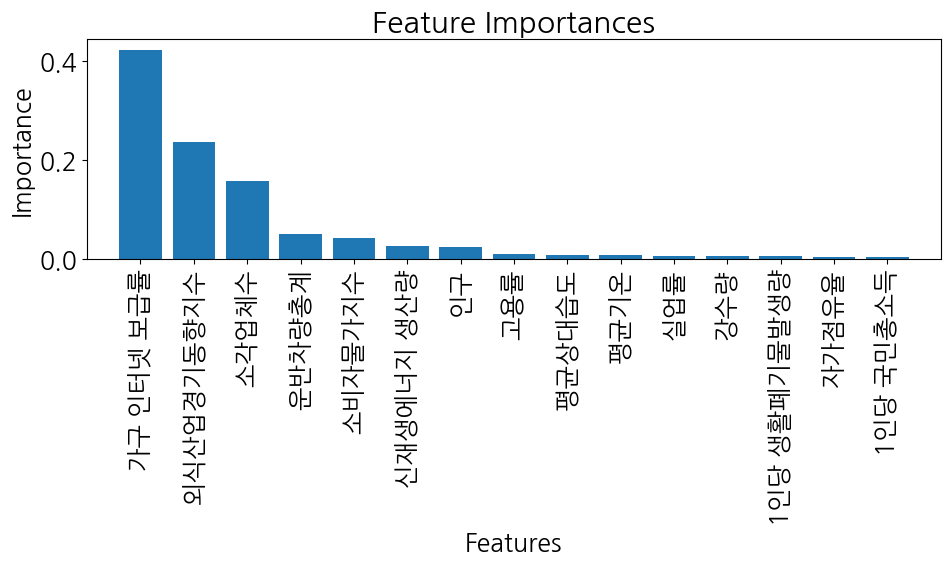

In [216]:
# rf feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # 내림차순 정렬
columns_names = data.columns[1:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), columns_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [217]:
# rf best parameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],  # 결정 트리 개수
    'max_depth': [5, 10, 15, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 3, 4, 5, 10],  # 내부 노드를 분할하는데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3, 4]  # 리프 노드에 필요한 최소 샘플 수
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(data_X, data_y)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Best cross-validation score : 1.55
MSE: 0.15
R^2: 0.91


<ipython-input-219-b48408a82822>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


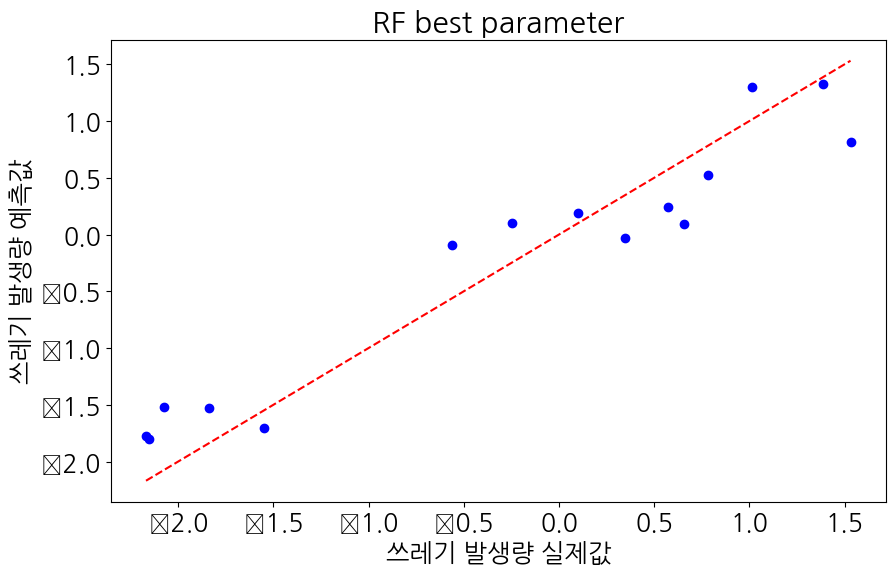

In [219]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score : {:.2f}".format(-grid_search.best_score_))

best_params = {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
best_rf = RandomForestRegressor(**best_params)

best_rf.fit(X_train, y_train)

# mse, r2점수
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# rf best parameter 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('RF best parameter')
plt.show()

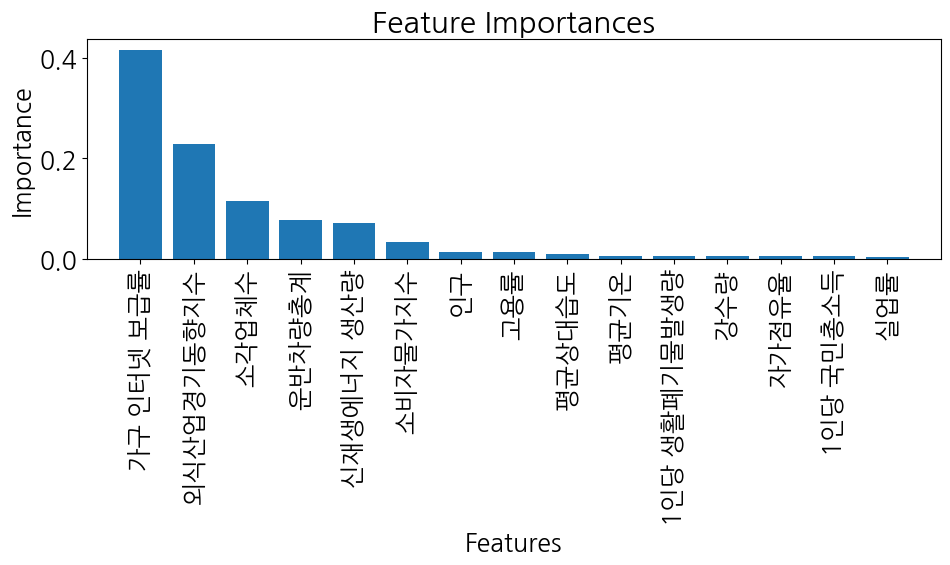

In [220]:
# rf best_parameter feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1] # 내림차순 정렬
columns_names = data.columns[1:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), columns_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

MSE: 0.29
R2: 0.83


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


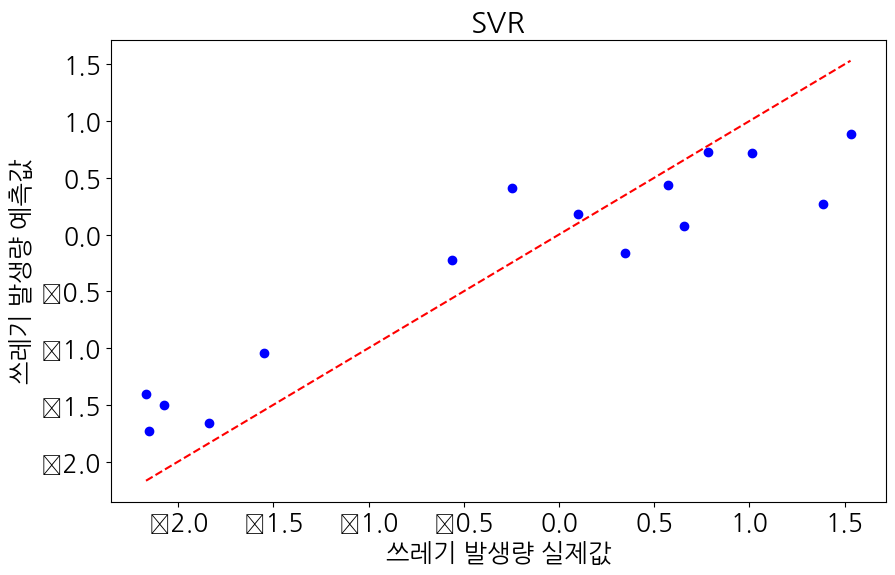

In [227]:
# svr
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.ravel())

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# mse, r2점수
print("MSE:", round(mse,2))
print("R2:", round(r2,2))

# SVR 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('SVR')
plt.show()

In [222]:
# svr best_parameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(data_X, data_y)

print("Best parameters found for SVR:")
print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found for SVR:
{'C': 0.1, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


MSE : 0.21
R^2 : 0.88


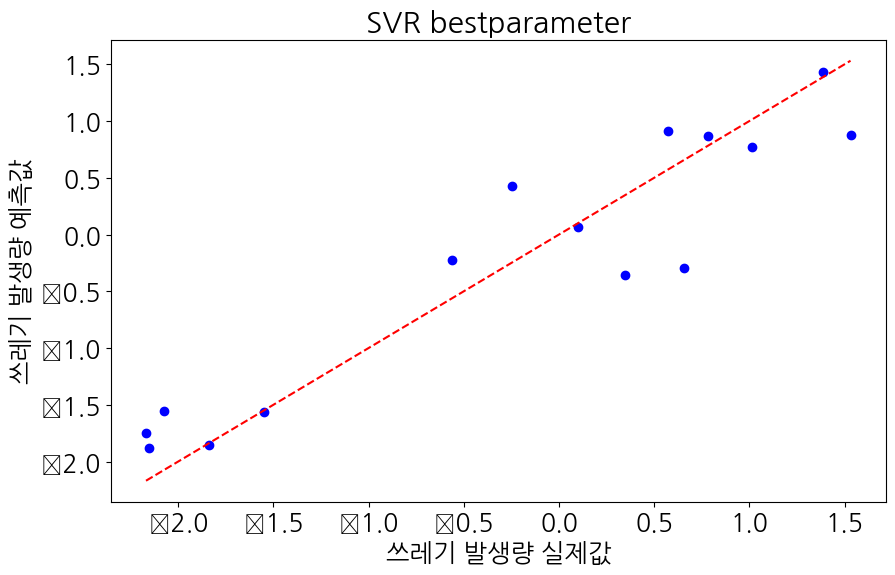

In [224]:
# best_parameter 적용
best_svr = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], epsilon=grid_search.best_params_['epsilon'])
best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)

# mse, r2점수
mse = mean_squared_error(y_test, y_pred)
print("MSE :", round(mse,2))
r2 = r2_score(y_test, y_pred)
print("R^2 :", round(r2,2))

# svr bestparamter 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('SVR bestparameter')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


MSE : 0.29
R^2 : 0.83


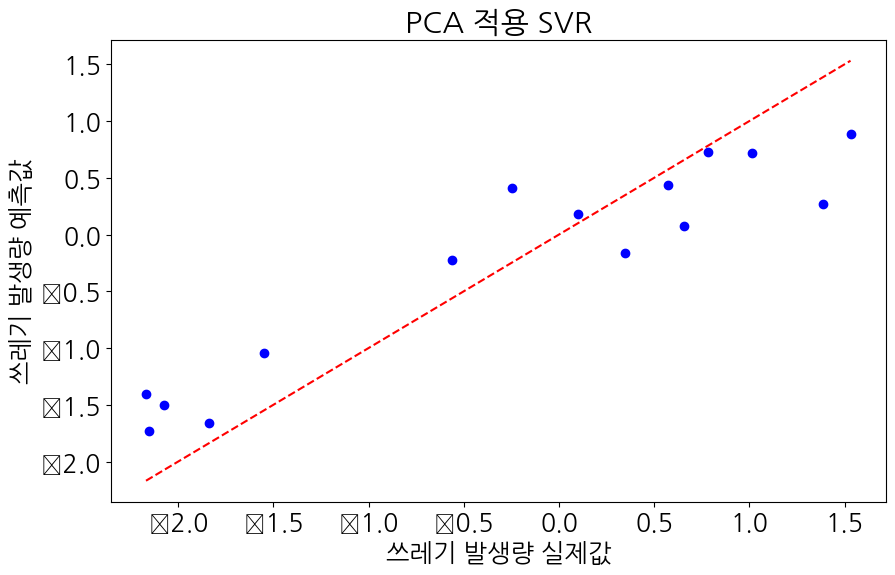

In [225]:
from sklearn.decomposition import PCA

# svr에 PCA 적용
pca = PCA(n_components=15)
X_pca = pca.fit_transform(data_X)

# pca적용된 걸로 새로 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, data_y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# mse, r2점수
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE :", round(mse,2))
r2 = r2_score(y_test, y_pred)
print("R^2 :", round(r2,2))

# svr에 PCA 적용 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('PCA 적용 SVR')
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


최적의 파라미터: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
MSE : 0.22
R^2 : 0.87


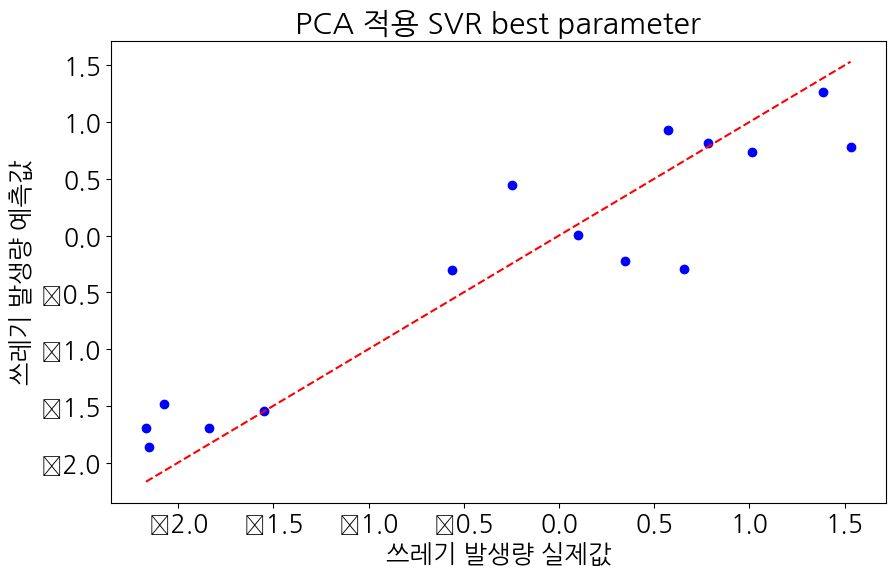

In [226]:
# svr_pca_bestparameter
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("최적의 파라미터:", grid_search.best_params_)

best_svr = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], epsilon=grid_search.best_params_['epsilon'])

best_svr.fit(X_train, y_train)
y_pred = best_svr.predict(X_test)

# mse, r2점수
mse = mean_squared_error(y_test, y_pred)
print("MSE :", round(mse,2))

r2 = r2_score(y_test, y_pred)
print("R^2 :", round(r2,2))
# svr_pca_bestparameter 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('쓰레기 발생량 실제값')
plt.ylabel('쓰레기 발생량 예측값')
plt.title('PCA 적용 SVR best parameter')
plt.show()